In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/AI/Flower

/content/drive/MyDrive/AI/Flower


In [3]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training=train_data.flow_from_directory('/content/drive/MyDrive/AI/Flower/Train',target_size=(150,150), batch_size=32, class_mode='categorical')
validation=train_data.flow_from_directory('/content/drive/MyDrive/AI/Flower/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 4826 images belonging to 5 classes.
Found 1575 images belonging to 5 classes.


In [5]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 20 lần học (epochs), mỗi lần học thì chỉ học␣256 dữ liệu (batch_size)
history=model.fit(training,epochs=40,batch_size=256,verbose=1, validation_data=validation)

Epoch 1/40
151/151 [==============================] - 1075s 7s/step - loss: 1.1790 - accuracy: 0.4961 - val_loss: 0.9950 - val_accuracy: 0.5371
Epoch 2/40
151/151 [==============================] - 85s 562ms/step - loss: 0.8902 - accuracy: 0.6295 - val_loss: 0.8846 - val_accuracy: 0.6476
Epoch 3/40
151/151 [==============================] - 84s 557ms/step - loss: 0.7495 - accuracy: 0.6981 - val_loss: 0.6226 - val_accuracy: 0.7752
Epoch 4/40
151/151 [==============================] - 78s 516ms/step - loss: 0.6603 - accuracy: 0.7458 - val_loss: 0.6474 - val_accuracy: 0.7543
Epoch 5/40
151/151 [==============================] - 77s 513ms/step - loss: 0.5663 - accuracy: 0.7920 - val_loss: 0.5697 - val_accuracy: 0.7676
Epoch 6/40
151/151 [==============================] - 76s 505ms/step - loss: 0.5311 - accuracy: 0.8019 - val_loss: 0.4815 - val_accuracy: 0.8343
Epoch 7/40
151/151 [==============================] - 77s 509ms/step - loss: 0.4837 - accuracy: 0.8232 - val_loss: 0.4863 - val_acc

In [7]:
# Lưu 
model.save("Flower_VN.h5")
model_1=load_model('Flower_VN.h5')

In [8]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.05428807809948921
Train Accuracy 0.9815582036972046


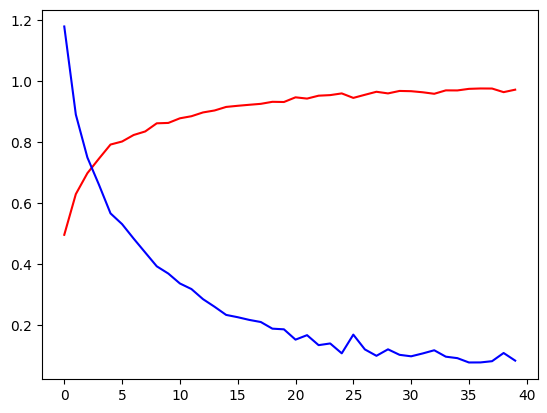

In [9]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()

1/1 [==============================] - 0s 446ms/step
Apricot


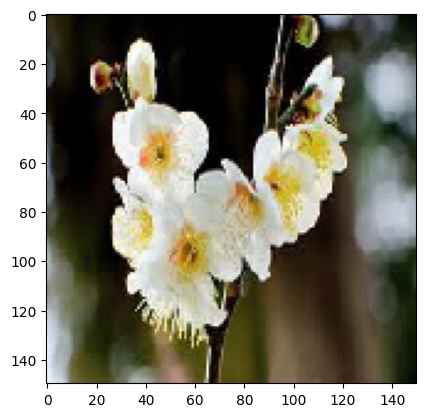

1/1 [==============================] - 0s 20ms/step
Daisy


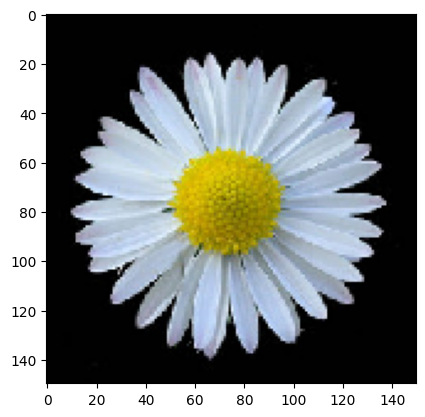

1/1 [==============================] - 0s 20ms/step
Lotus


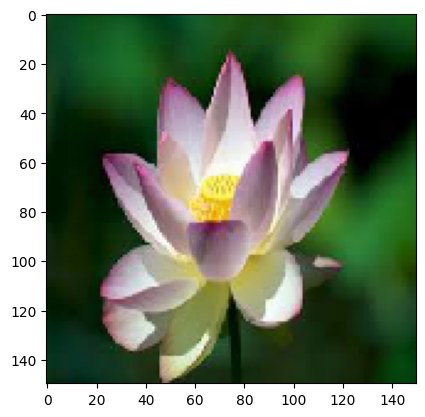

1/1 [==============================] - 0s 18ms/step
Rose


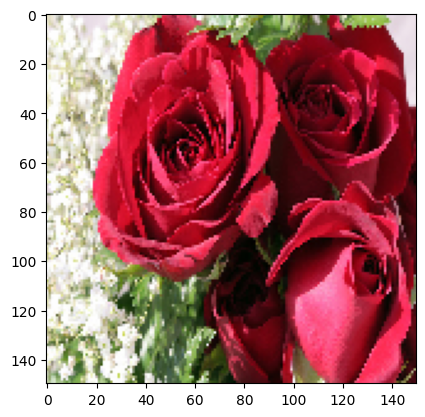

1/1 [==============================] - 0s 19ms/step
Lotus


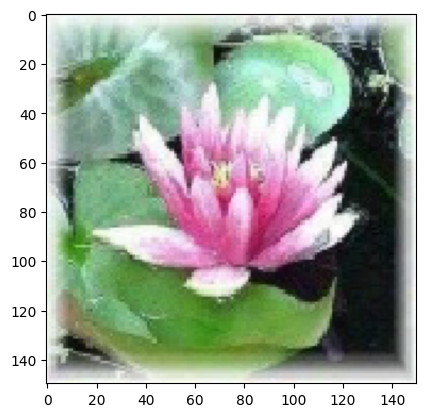

In [10]:
test="/content/drive/MyDrive/AI/Flower/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Apricot','Daisy','Lotus','Rose','WaterLily']
  print(class_name[result])
  plt.show()